In [1]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "shivanjalijagtap18" # username from the json file
os.environ['KAGGLE_KEY'] = "8279046c2b4ff370672a6380dd148a3e" # key from the json file

!kaggle datasets download -d warcoder/lumpy-skin-images-dataset

Dataset URL: https://www.kaggle.com/datasets/warcoder/lumpy-skin-images-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [2]:
!unzip -n lumpy-skin-images-dataset.zip

Archive:  lumpy-skin-images-dataset.zip
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_10.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_100.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_101.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_102.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_103.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_104.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_105.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_106.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_107.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_108.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_109.png  
  inflating: Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin_11.png  
  inflating: Lumpy Skin Images Dataset/Lump

Found 715 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6742 - loss: 9.0489 - val_accuracy: 0.8693 - val_loss: 2.2215 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9094 - loss: 0.6333 - val_accuracy: 0.8562 - val_loss: 0.8266 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9369 - loss: 0.1898 - val_accuracy: 0.8497 - val_loss: 0.5018 - learning_rate: 0.0010
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9539 - loss: 0.1405 - val_accuracy: 0.8301 - val_loss: 0.6093 - learning_rate: 0.0010
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9832 - loss: 0.0664 - val_accuracy: 0.8497 - val_loss: 0.6406 - learning_rate: 0.0010
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9755 - loss: 0.0739 - val_accuracy: 0.8497 - val_loss: 0.6278 - learning_rate: 1.0000e-04


Training completed in 247.34 seconds.
Model saved to mobilenet_model.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
Accuracy: 0.9166666666666666
Precision: 0.9428571428571428
Recall: 0.9339622641509434
F1 Score: 0.9383886255924171


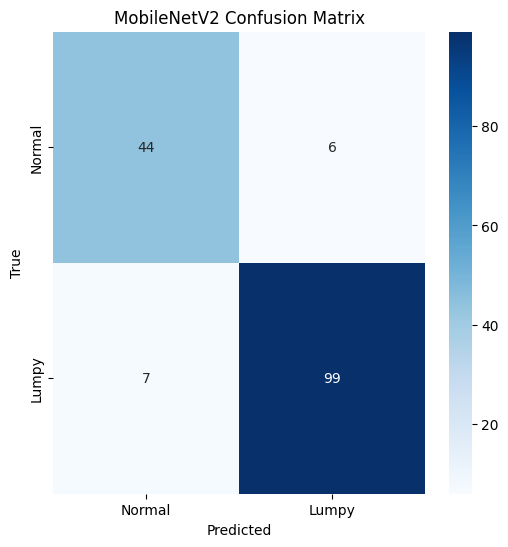

In [3]:
import os
import shutil
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
random.seed(42)

# Source paths
LUMPY_PATH = '/content/Lumpy Skin Images Dataset/Lumpy Skin'
NORMAL_PATH = '/content/Lumpy Skin Images Dataset/Normal Skin'

# Target directories
BASE_DIR = 'data'
SPLITS = ['train', 'val', 'test']
SPLIT_RATIOS = [0.7, 0.15, 0.15]

for split in SPLITS:
    os.makedirs(f'{BASE_DIR}/{split}/Lumpy Skin', exist_ok=True)
    os.makedirs(f'{BASE_DIR}/{split}/Normal Skin', exist_ok=True)

def split_and_copy(source_dir, class_name):
    files = os.listdir(source_dir)
    random.shuffle(files)

    total = len(files)
    train_end = int(SPLIT_RATIOS[0] * total)
    val_end = train_end + int(SPLIT_RATIOS[1] * total)

    split_files = {
        'train': files[:train_end],
        'val': files[train_end:val_end],
        'test': files[val_end:]
    }

    for split in SPLITS:
        for fname in split_files[split]:
            src = os.path.join(source_dir, fname)
            dst = os.path.join(BASE_DIR, split, class_name, fname)
            shutil.copy2(src, dst)

# Copy images
split_and_copy(LUMPY_PATH, 'Lumpy Skin')
split_and_copy(NORMAL_PATH, 'Normal Skin')

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
MODEL_SAVE_PATH = 'mobilenet_model.h5'

# Image Generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    'data/train', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    'data/val', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    'data/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

# Build MobileNetV2 Model
def build_mobilenet_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = build_mobilenet_model()
start_time = time.time()

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.1, patience=2)
    ]
)

train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds.")

# Save model
model.save(MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")

# Evaluate on test set
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Lumpy'], yticklabels=['Normal', 'Lumpy'])
plt.title("MobileNetV2 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
